In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Yoon2009data.csv')

In [3]:
df.columns

Index(['SubjectID', 'Group', 'Surround', 'Threshold'], dtype='object')

In [4]:
df['Threshold'][df['Threshold'] > 75] = 75

/Users/arokem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
%load_ext rpy2.ipython

In [6]:
%%R -i df
library(ez)
aov= ezANOVA(df,
             wid=.(SubjectID),
             dv=.(Threshold),
             within=.(Surround), 
             between=.(Group), 
             type=3)

print(aov)

/Users/arokem/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/Users/arokem/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Converting "SubjectID" to factor for ANOVA.

  warnings.warn(x, RRuntimeWarning)
/Users/arokem/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA().

  warnings.warn(x, RRuntimeWarning)


$ANOVA
          Effect DFn DFd          F            p p<.05        ges
2          Group   1  35   1.471032 2.333059e-01       0.02592766
3       Surround   2  70 120.181257 2.306786e-23     * 0.55734836
4 Group:Surround   2  70   3.045297 5.393209e-02       0.03091846

$`Mauchly's Test for Sphericity`
          Effect         W         p p<.05
3       Surround 0.9940952 0.9042225      
4 Group:Surround 0.9940952 0.9042225      

$`Sphericity Corrections`
          Effect       GGe        p[GG] p[GG]<.05      HFe        p[HF]
3       Surround 0.9941298 3.061627e-23         * 1.053827 2.306786e-23
4 Group:Surround 0.9941298 5.426379e-02           1.053827 5.393209e-02
  p[HF]<.05
3         *
4          



In [7]:
data = df[(df["Surround"] == "Para") | (df["Surround"] == "Ortho")]

In [8]:
%%R -i data
library(ez)
aov= ezANOVA(data,
             wid=.(SubjectID),
             dv=.(Threshold),
             within=.(Surround), 
             between=.(Group),
             type=3)

print(aov)

/Users/arokem/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/Users/arokem/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Converting "SubjectID" to factor for ANOVA.

  warnings.warn(x, RRuntimeWarning)
/Users/arokem/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA().

  warnings.warn(x, RRuntimeWarning)


$ANOVA
          Effect DFn DFd           F            p p<.05        ges
2          Group   1  35   0.9317284 3.410368e-01       0.02092389
3       Surround   1  35 115.0300407 1.315391e-12     * 0.39325120
4 Group:Surround   1  35   5.8541556 2.087327e-02     * 0.03193156



In [9]:
import seaborn as sns
%matplotlib inline

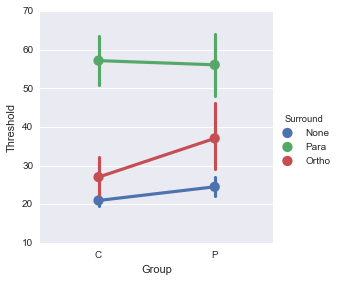

In [10]:
sns.factorplot(data=df, x="Group", y="Threshold", hue="Surround")

In [11]:
piv = df.pivot("SubjectID", "Surround", "Threshold")

In [12]:
piv["Group"] = [df["Group"][df["SubjectID"] == i].iloc[0] for i in piv.index]

In [13]:
piv["OS_NS"] = piv["Ortho"] / piv["None"]
piv["PS_NS"] = piv["Para"] / piv["None"]

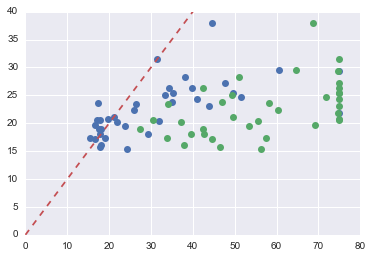

In [14]:
plt.plot(piv["Ortho"], piv["None"], 'o')
plt.plot(piv["Para"], piv["None"], 'o')
plt.plot([0, 40], [0, 40], '--')

/Users/arokem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


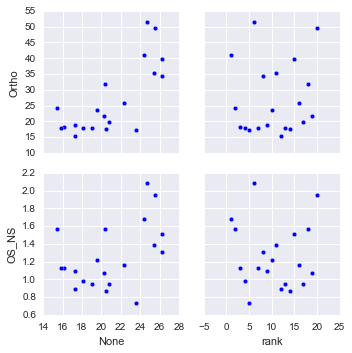

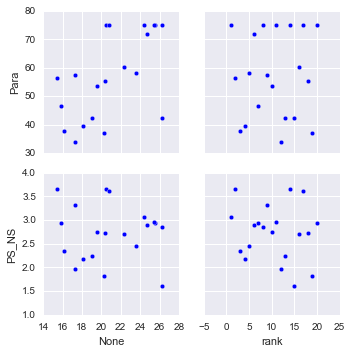

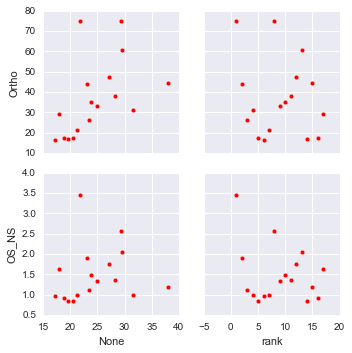

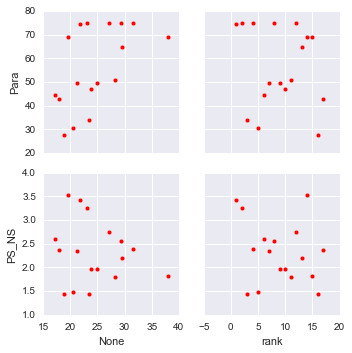

In [15]:
color_dict = {"C": 'blue', "P": 'red'}
for group, group_piv in piv.groupby("Group"):
    group_piv["rank"] = np.argsort(group_piv["None"]) + 1
    sns.pairplot(group_piv, x_vars=["None", "rank"], 
                 y_vars=["Ortho", "OS_NS"],
                 plot_kws=dict(color=color_dict[group]))
    
    sns.pairplot(group_piv, x_vars=["None", "rank"], 
                 y_vars=["Para", "PS_NS"],
                 plot_kws=dict(color=color_dict[group]))
    